In [1]:
# data processing
import numpy as np
import pandas as pd

# text processing and NLP
import nltk
from textblob import TextBlob

# gensim for topic modeling
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# viz
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import re
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd 
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
import time
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re

# Carga la base de datos
def load_data(file_path):
    return pd.read_csv(file_path)

# Elimina filas con valores nulos
def remove_null_rows(df):
    return df.dropna()

# Convierte texto a minúsculas
def to_lower(df, column):
    return df[column].apply(lambda x: x.lower())

# Elimina puntuación y números  
def remove_punctuation_and_numbers(text):
    return re.sub(r'[^\w\s]', '', text)

# Tokeniza el texto
def tokenize_text(text):
    return word_tokenize(text)

# Elimina stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Procesa el texto
def process_text(text):
    text = remove_punctuation_and_numbers(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    return''.join(tokens)

# Aplica el procesamiento de texto a la columna especificada
def apply_text_processing(df, column):
    return df[column].apply(process_text)

# Crea un pipeline de procesamiento de datos
def text_processing_pipeline(file_path, column):
    df = load_data(file_path)
    df = remove_null_rows(df)
    df[column] = to_lower(df, column)
    df[column] = apply_text_processing(df, column)
    return df



In [4]:
#import nltk
#nltk.download('punkt')
#nltk.download('punkt_tab')

# Ejemplo de uso
file_path = 'netflix_reviews.csv'
column = 'content'
df = text_processing_pipeline(file_path, column)
print(df.head())



                               reviewId          userName  \
0  f9237dcd-c584-4c32-a5b0-6ea65baf403d           Chethan   
1  797ea22d-f49f-49c2-b43c-116c5f45ded2  Ttaniipah BasyiL   
2  9e3f6901-97f4-4ea4-8117-dd5821a7e5bb   Krista Anderson   
4  cd32324f-f0d8-4bd5-a5a8-757db19ae355   Michael Chapman   
5  e2822126-f4e6-4863-81bc-2f333fe3c972         Jim Hardy   

                                             content  score  thumbsUpCount  \
0                                needkannadalanguage      2              0   
1      suaradarispeakersamaorangnyakoagakgaknyambung      1              0   
2  lovenetflixusuallycantplayappphonepayingablewa...      2              0   
4  worthlessgoingbuyingnewtvwatchsomethingbiggerc...      1              0   
5  simplywantremoveappa71imalloweddisableremovekn...      1              0   

     reviewCreatedVersion                   at              appVersion  
0   8.131.0 build 3 50829  2024-10-08 14:46:21   8.131.0 build 3 50829  
1   8.135.1 build 

In [5]:
df['at'] = pd.to_datetime(df['at'])


In [6]:
df.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,f9237dcd-c584-4c32-a5b0-6ea65baf403d,Chethan,needkannadalanguage,2,0,8.131.0 build 3 50829,2024-10-08 14:46:21,8.131.0 build 3 50829
1,797ea22d-f49f-49c2-b43c-116c5f45ded2,Ttaniipah BasyiL,suaradarispeakersamaorangnyakoagakgaknyambung,1,0,8.135.1 build 7 50902,2024-10-08 14:33:23,8.135.1 build 7 50902
2,9e3f6901-97f4-4ea4-8117-dd5821a7e5bb,Krista Anderson,lovenetflixusuallycantplayappphonepayingablewa...,2,0,8.135.1 build 7 50902,2024-10-08 14:30:54,8.135.1 build 7 50902
4,cd32324f-f0d8-4bd5-a5a8-757db19ae355,Michael Chapman,worthlessgoingbuyingnewtvwatchsomethingbiggerc...,1,0,8.134.1 build 10 50872,2024-10-08 14:15:18,8.134.1 build 10 50872
5,e2822126-f4e6-4863-81bc-2f333fe3c972,Jim Hardy,simplywantremoveappa71imalloweddisableremovekn...,1,0,8.111.0 build 4 50659,2024-10-08 13:57:33,8.111.0 build 4 50659
6,0af369f7-5af4-4f54-a669-f41b37ef07f8,Vinna Marie Derder OBERES,reallyhardtimewatchingmovieseriesmoviesuddenly...,1,0,8.135.1 build 7 50902,2024-10-08 13:47:01,8.135.1 build 7 50902
7,1bc66f3c-013d-445f-a81a-44813de0e19c,Haari Vignesh,newuisuckimliterallygoingcancelmembershipdontc...,4,0,8.111.0 build 4 50659,2024-10-08 13:47:01,8.111.0 build 4 50659
9,81cae456-69a0-4858-926d-6519d6ca50df,Robin,wouldlikewatchchanneltvtabletn,5,0,8.134.1 build 10 50872,2024-10-08 13:42:25,8.134.1 build 10 50872
11,7fd58250-7c83-499f-80a8-f040c0dc11b4,Muhammad Ahsan,loveapplicationgivelessmoney90moviesseries18mo...,4,0,8.134.1 build 10 50872,2024-10-08 13:35:36,8.134.1 build 10 50872
12,7f980503-48c4-4f5d-9b3a-ac224a9551d3,Shehzad Baxi,cantablelogintvinspitemembershipeventriedreach...,1,0,8.134.1 build 10 50872,2024-10-08 13:32:24,8.134.1 build 10 50872


In [7]:
# Ensure 'content_c' exists or replace it with the correct column name, e.g., 'content'
df = df[['content', 'score', 'reviewId', 'at', 'thumbsUpCount']]
df.head()

,content,score,reviewId,at,thumbsUpCount
0,needkannadalanguage,2,f9237dcd-c584-4c32-a5b0-6ea65baf403d,2024-10-08 14:46:21,0
1,suaradarispeakersamaorangnyakoagakgaknyambung,1,797ea22d-f49f-49c2-b43c-116c5f45ded2,2024-10-08 14:33:23,0
2,lovenetflixusuallycantplayappphonepayingablewa...,2,9e3f6901-97f4-4ea4-8117-dd5821a7e5bb,2024-10-08 14:30:54,0
4,worthlessgoingbuyingnewtvwatchsomethingbiggerc...,1,cd32324f-f0d8-4bd5-a5a8-757db19ae355,2024-10-08 14:15:18,0
5,simplywantremoveappa71imalloweddisableremovekn...,1,e2822126-f4e6-4863-81bc-2f333fe3c972,2024-10-08 13:57:33,0


In [8]:
def tokenize_text(text):
    return re.sub(r'[^\w\s]', '', text).split()

# Crea un contador de frecuencia de palabras
word_freq = Counter()

# Aplica el contador a la columna 'content'
for text in df['content']:
    tokens = tokenize_text(text)
    word_freq.update(tokens)

# Muestra las 10 palabras más frecuentes
print(word_freq.most_common(10))
		

[('good', 369), ('nice', 111), ('great', 63), ('love', 62), ('goodapp', 51), ('excellent', 45), ('best', 37), ('amazing', 36), ('lovenetflix', 31), ('awesome', 30)]


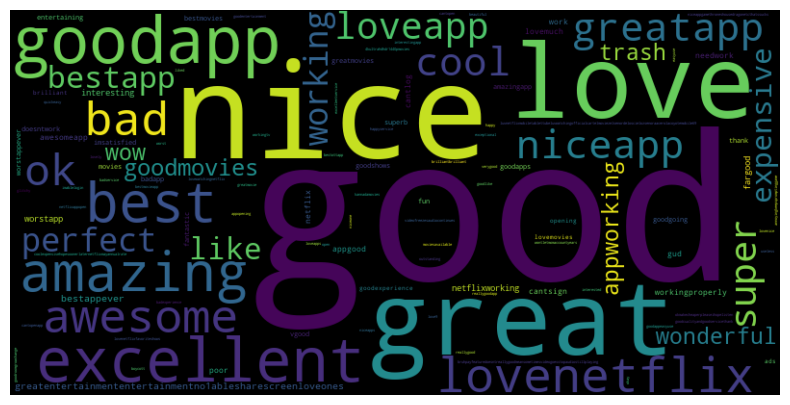

In [9]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Carga la lista de stopwords
stop_words = set(stopwords.words('english'))

# Filtra las stopwords
word_freq = {word: freq for word, freq in word_freq.items() if word not in stop_words}

# Crea una nube de palabras
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

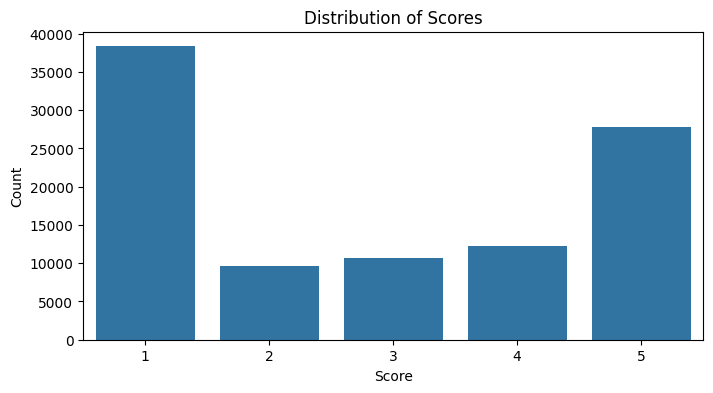

In [10]:
# analyzing score distribution
score_counts = df.score.value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# (Could improve)

# Carga la biblioteca NLTK
nltk.download('vader_lexicon')

# Crea un objeto SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analiza el sentimiento de las reseñas
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Clasifica las reseñas en positivas, negativas o neutrales
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positivo' if x > 0 else 'negativo' if x < 0 else 'neutro')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pajua\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


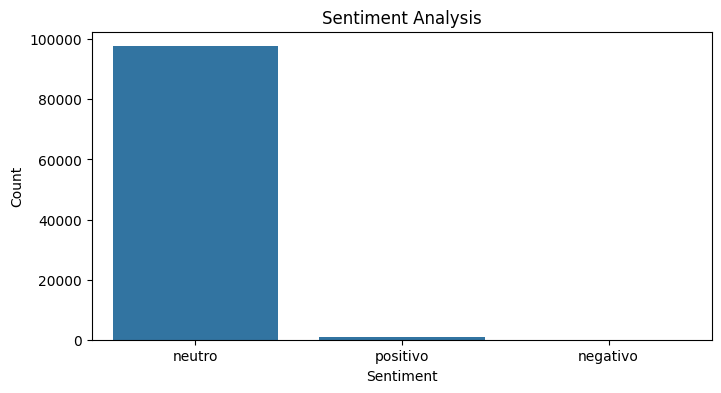

In [12]:
# resultados de la clasificación de sentimientos
sentiment_counts = df['sentiment_class'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['score'], test_size=0.2, random_state=42)

In [15]:
vectorizer = TfidfVectorizer()
X_train_vectorizado = vectorizer.fit_transform(X_train)
X_test_vectorizado = vectorizer.transform(X_test)

In [17]:
modelo = MultinomialNB()
modelo.fit(X_train_vectorizado, y_train)

MultinomialNB()

In [18]:
y_pred = modelo.predict(X_test_vectorizado)
print('Precisión:', accuracy_score(y_test, y_pred))
print('Informe de clasificación:')
print(classification_report(y_test, y_pred))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))

Precisión: 0.40125709651257097
Informe de clasificación:
              precision    recall  f1-score   support

           1       0.39      1.00      0.57      7684
           2       0.00      0.00      0.00      1963
           3       1.00      0.00      0.00      2157
           4       0.50      0.00      0.00      2405
           5       0.85      0.04      0.08      5519

    accuracy                           0.40     19728
   macro avg       0.55      0.21      0.13     19728
weighted avg       0.56      0.40      0.24     19728

Matriz de confusión:
[[7679    0    0    0    5]
 [1960    0    0    0    3]
 [2146    0    2    0    9]
 [2379    0    0    2   24]
 [5284    0    0    2  233]]


In [19]:
#LogisticRegression(), RandomForestClassifier()

# Modelo de regresión logística
modelo = LogisticRegression()

# Entrena el modelo
modelo.fit(X_train_vectorizado, y_train)


LogisticRegression()

In [20]:
y_pred = modelo.predict(X_test_vectorizado)
print('Precisión:', accuracy_score(y_test, y_pred))
print('Informe de clasificación:')
print(classification_report(y_test, y_pred))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))

Precisión: 0.40135847526358476
Informe de clasificación:
              precision    recall  f1-score   support

           1       0.39      1.00      0.57      7684
           2       1.00      0.00      0.00      1963
           3       1.00      0.00      0.00      2157
           4       0.50      0.00      0.00      2405
           5       0.85      0.04      0.08      5519

    accuracy                           0.40     19728
   macro avg       0.75      0.21      0.13     19728
weighted avg       0.66      0.40      0.24     19728

Matriz de confusión:
[[7679    0    0    0    5]
 [1958    2    0    0    3]
 [2146    0    2    0    9]
 [2379    0    0    2   24]
 [5284    0    0    2  233]]
